In [1]:
import pandas as pd
import pandas_datareader.data as web
import requests
from datetime import datetime
import io

def stockprice(symbol,startday):
    
    url = "http://finance.google.com/finance/historical"

    params = {}
    params['q'] = symbol
    params['startdate'] = startday
    params['output'] = 'csv'

    r = requests.get(url, params=params)
    data1=r.text
    rawData = pd.read_csv(io.StringIO(data1), index_col=0)
    rawData = rawData[::-1] 
    
    return rawData

In [2]:
aa=stockprice('MSFT',datetime(2016,2,10))
aa.head()

,Open,High,Low,Close,Volume
Date,,,,,
10-Feb-16,49.89,50.39,49.52,49.71,37899918
11-Feb-16,48.68,50.11,48.51,49.69,48448154
12-Feb-16,50.25,50.68,49.75,50.50,33292336
16-Feb-16,50.90,51.09,50.13,51.09,35937137
17-Feb-16,51.49,52.77,51.45,52.42,39670289


In [3]:
type(aa)

pandas.core.frame.DataFrame

In [5]:
import matplotlib.pyplot as plt
aa[['Close','Volume']].plot(subplots = True, figsize = (10, 8))
plt.legend(loc='best')

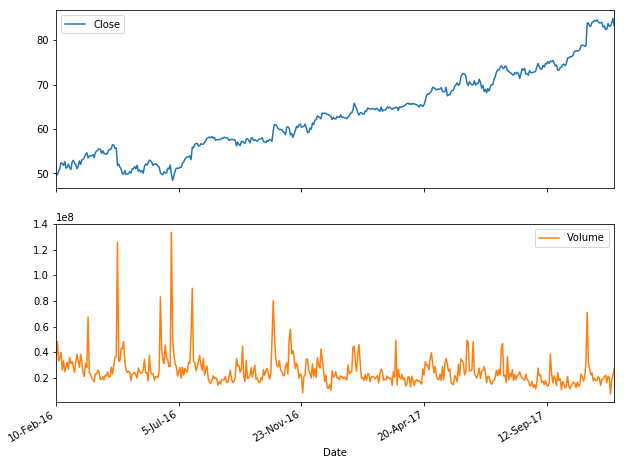

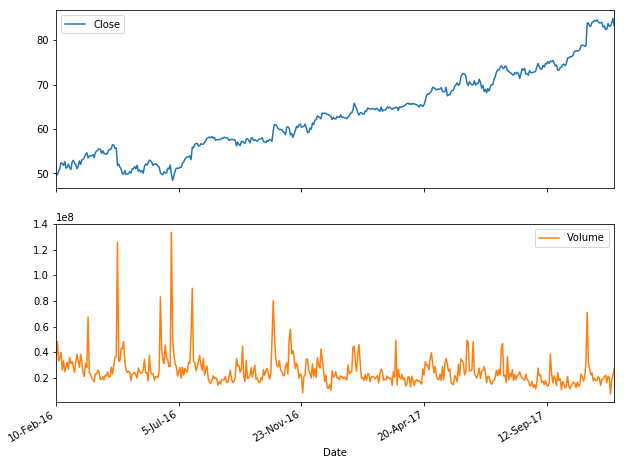

In [6]:
plt.show()

## 第二題

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
import kchart

In [2]:
df = web.DataReader("2330.tw", 'yahoo', datetime(2016,2,1))
df = df.dropna()  # 有遺失值的觀測值都刪除
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-01,144.0,144.0,141.5,144.0,134.096176,40943000.0
2016-02-02,144.0,144.5,141.5,142.5,132.699341,25380000.0
2016-02-03,145.0,146.0,144.5,146.0,135.958618,70465000.0
2016-02-15,146.0,146.5,142.0,145.0,135.027390,72875000.0
2016-02-16,146.0,148.0,145.5,147.5,137.355453,55006000.0


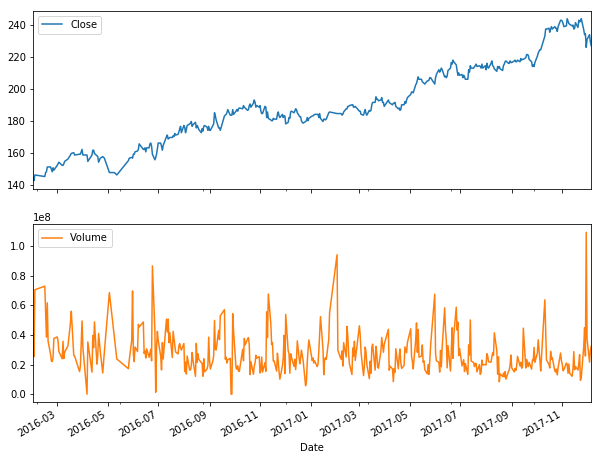

In [3]:
df[['Close','Volume']].plot(subplots = True, figsize = (10, 8))
plt.legend(loc='best')
plt.show()

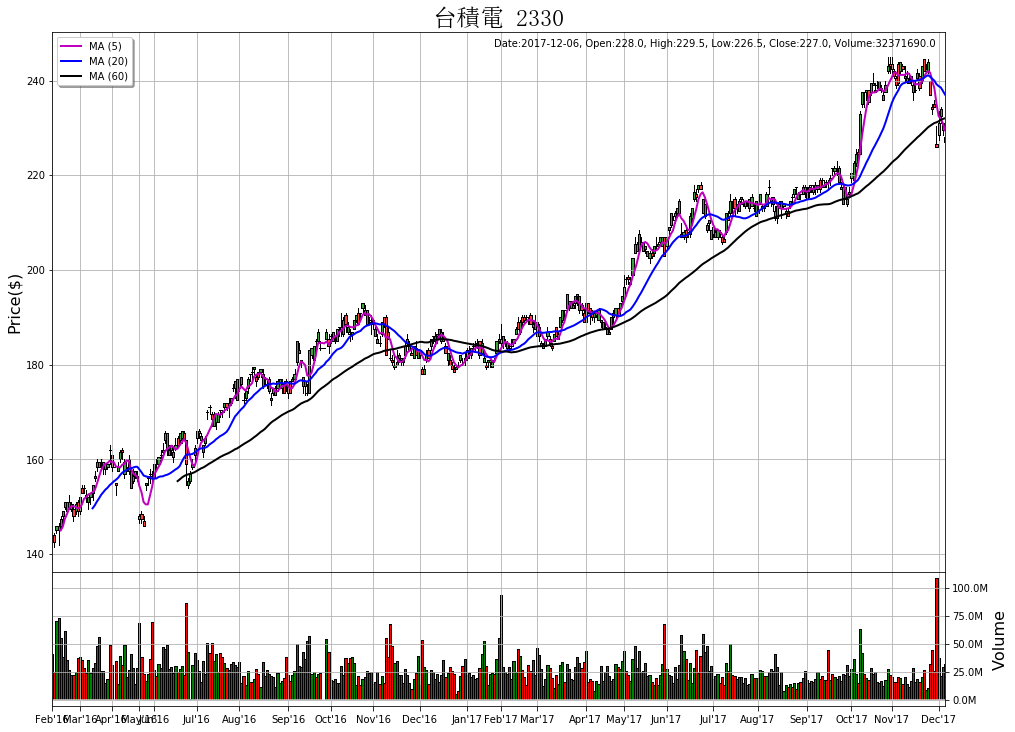

In [4]:
kchart.draw(df, '台積電 2330')